# Data Exploration / Visualization (part 1): 


Based on the articles in the state of the art, some of the more interesting insights to explore are the following ones:

+ plaque pressence (territory independent) VS CV event
+ atheroma extent VS CV event (violin)
+ IMT VS CV event (violin )
+ independent factors, how do they affect on a plaque presence and how related they are for a CV event.

We will have to take into account the variables that can be confounders of the variables under study. 

In [ref: "Confounding Variables in Epidemiologic Studies: Basics and Beyond"] it states that finding those variables that can be confounders is not an evident job. Some statistical techniques can be considered but normally a knowledge domain can be more useful.

Before dealing with that, let's see a summary of some of the characteristics in the dataset, in numbers :

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_total=pd.read_excel("DATA/dades_excels/base de datos seguiments130618.xlsx")
df_total.set_index('Códigobiobanco', inplace=True)
COL=df_total.columns
l=[]
for x in COL:
    if (x[:4]=='plac'):
        l.append(x)
        
l=l[:10] # contains all column names with plaque
print(l)
cols_clas_placa=l+['EventoCV_Si_No','muerte',"sexo"]
df= df_total.loc[:,cols_clas_placa]
df['Totalplaques']=df[l[0]].fillna(0)+df[l[1]].fillna(0)+df[l[2]].fillna(0)+df[l[3]].fillna(0)+df[l[4]].fillna(0)+df[l[5]].fillna(0)+df[l[6]].fillna(0)+df[l[7]].fillna(0)+df[l[8]].fillna(0)+df[l[9]].fillna(0)
df['CCAplaca']=df['placas_cc_d']+df['placas_cc_i']
df['bulb_placa']= df['placas_med_bif_d']+df['placas_med_bif_d']
df['mortCV']=df['muerte']=='CV death'

['placas_cc_d', 'placas_med_bif_d', 'placas_med_car_d', 'placas_cc_i', 'placas_med_bif_i', 'placas_med_car_i', 'placas_fem_com_d', 'placas_fem_sup_d', 'placas_fem_com_i', 'placas_fem_sup_i']


In [8]:
len(df_total.columns)

327

The dataset has 327 variables, but we will be mostly interested in the following ones:

In [9]:
interesting_columns = ["sexo","Tabaquismo_Si_No","tipoindividuo","Ingestaalcoholgdia","diabetes","hipertenso","dislipemico",
                       "Edadfechaexploracionvascular","GIMmedio",'EventoCV_Si_No',"TipoECV1","muerte",
                       "Muerte_S_N"]+l

In [10]:
interesting_columns

['sexo',
 'Tabaquismo_Si_No',
 'tipoindividuo',
 'Ingestaalcoholgdia',
 'diabetes',
 'hipertenso',
 'dislipemico',
 'Edadfechaexploracionvascular',
 'GIMmedio',
 'EventoCV_Si_No',
 'TipoECV1',
 'muerte',
 'Muerte_S_N',
 'placas_cc_d',
 'placas_med_bif_d',
 'placas_med_car_d',
 'placas_cc_i',
 'placas_med_bif_i',
 'placas_med_car_i',
 'placas_fem_com_d',
 'placas_fem_sup_d',
 'placas_fem_com_i',
 'placas_fem_sup_i']

Let's do some manipulations to have the data in a firendlier format:

In [11]:
df_resum = df_total[interesting_columns]
df_resum["code"] = df_resum.index
df_resum["franja_edat"] = np.where(df_resum["Edadfechaexploracionvascular"]<=35,"age <=35",
                                  np.where(df_resum["Edadfechaexploracionvascular"]<=45,"age 36-45",
                                  np.where(df_resum["Edadfechaexploracionvascular"]<=55,"age 46-55",
                                  np.where(df_resum["Edadfechaexploracionvascular"]<=65,"age 56-65",
                                  np.where(df_resum["Edadfechaexploracionvascular"]<=75,"age 66-75","age >75"
                                  )))))

df_resum["EventoCV_Si_No"] = np.where(df_resum["EventoCV_Si_No"] == 0 , "NO CV Event", "YES CV Event")
df_resum["sexo"] = np.where(df_resum["sexo"] == 0 , "Male","Female")
df_resum["diabetes"] = np.where(df_resum["diabetes"] == 0, "No Diabetes", "Yes Diabetes")
df_resum["hipertenso"] = np.where(df_resum["hipertenso"] == 0 , "No Hypertens", "Yes Hypertens")
df_resum["dislipemico"] = np.where(df_resum["dislipemico"] == 0 , "No dyslipemic", "Yes dyslipemic")
df_resum["Tabaquismo_Si_No"] = np.where(df_resum["Tabaquismo_Si_No"] == 0 , "No smoking", "Yes smoking")
df_resum["Presence_plaque"] = np.where(df["Totalplaques"] > 0 , "Plaque", "No plaque")
df_resum['Totalplaques']=df_resum[l[0]].fillna(0)+df_resum[l[1]].fillna(0)+df_resum[l[2]].fillna(0)+df_resum[l[3]].fillna(0)+df_resum[l[4]].fillna(0)+df_resum[l[5]].fillna(0)+df_resum[l[6]].fillna(0)+df_resum[l[7]].fillna(0)+df_resum[l[8]].fillna(0)+df_resum[l[9]].fillna(0)

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [12]:
pivot_1 = df_resum.pivot_table(index=["sexo"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_2 = df_resum.pivot_table(index=["diabetes"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_3 = df_resum.pivot_table(index=["hipertenso"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_4 = df_resum.pivot_table(index=["dislipemico"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_5 = df_resum.pivot_table(index="franja_edat",columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)

This table the number of patients for qualitative variables registered for the patients in the NEFRONA study. In [paper 3 de NEFRONA] states that this factors are considered risk factors associated with having CV events.

In [13]:
pivot_ = pd.concat([pivot_1, pivot_2,pivot_3,pivot_4]).fillna(0)
pivot_

EventoCV_Si_No,NO CV Event,YES CV Event
Female,1132,66
Male,1656,150
No Diabetes,2199,124
Yes Diabetes,589,92
No Hypertens,564,15
Yes Hypertens,2224,201
No dyslipemic,1134,59
Yes dyslipemic,1654,157


Let's have a look now on some of the quantitative factors: 

In [14]:
from scipy import stats
# chi square test, do gender and cv are independent?
# null hypothesis : they are independent
stats.chi2_contingency(pivot_1.values)
# p-value = 0.0046 < 0.01 -> they are independent

(8.02624311169712,
 0.0046104371091944653,
 1,
 array([[ 1111.85885486,    86.14114514],
        [ 1676.14114514,   129.85885486]]))

In [15]:
pivot_1.values.T

array([[1132, 1656],
       [  66,  150]])

In [16]:
df_resum.pivot_table(index=["sexo"],values = "code",aggfunc = np.count_nonzero)

,code
sexo,
Female,1198
Male,1806


The first aspect to view may be directly how a plaque presence is related to have a CV event. In this paper [] this idea is already explored.

In [17]:
df["EventoCV_Si_No"] = np.where(df["EventoCV_Si_No"] == 0, "No event CV", "Event CV")
df["sexo"] = np.where(df["sexo"] == 0, "Female", "Male")


# Plaque Pressence (independent on territory) VS CV event

This section wants to answer the first aspect, is the plaque pressence related to ultimately having a CV event? 

In [18]:
df_resum["Presence_plaque"] = np.where(df["Totalplaques"] > 0 , "Plaque", "No plaque")
df_resum.head()

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,sexo,Tabaquismo_Si_No,tipoindividuo,Ingestaalcoholgdia,diabetes,hipertenso,dislipemico,Edadfechaexploracionvascular,GIMmedio,EventoCV_Si_No,...,placas_med_bif_i,placas_med_car_i,placas_fem_com_d,placas_fem_sup_d,placas_fem_com_i,placas_fem_sup_i,code,franja_edat,Presence_plaque,Totalplaques
Códigobiobanco,,,,,,,,,,,,,,,,,,,,,
1801,Male,Yes smoking,1,10,Yes Diabetes,Yes Hypertens,No dyslipemic,73,0.955,NO CV Event,...,0.0,0.0,1.0,1.0,1.0,1.0,1801,age 66-75,Plaque,5.0
1802,Male,Yes smoking,1,10,Yes Diabetes,Yes Hypertens,No dyslipemic,65,NaN,NO CV Event,...,1.0,1.0,0.0,1.0,0.0,0.0,1802,age 56-65,Plaque,6.0
1803,Male,Yes smoking,1,0,No Diabetes,Yes Hypertens,Yes dyslipemic,66,0.745,NO CV Event,...,0.0,0.0,0.0,0.0,0.0,0.0,1803,age 66-75,No plaque,0.0
1804,Male,Yes smoking,1,10,No Diabetes,Yes Hypertens,Yes dyslipemic,63,1.060,NO CV Event,...,1.0,1.0,1.0,0.0,0.0,0.0,1804,age 56-65,Plaque,5.0
1805,Male,Yes smoking,1,0,No Diabetes,Yes Hypertens,Yes dyslipemic,48,0.560,NO CV Event,...,0.0,0.0,0.0,0.0,0.0,0.0,1805,age 46-55,No plaque,0.0


In [20]:


pivot_ = df_resum.pivot_table(index="Presence_plaque",columns="EventoCV_Si_No",values = "sexo",aggfunc = np.count_nonzero)
pivot_ 

EventoCV_Si_No,NO CV Event,YES CV Event
Presence_plaque,,
No plaque,980,21
Plaque,1808,195


In [21]:
# total = [total_no_plaque total_no_plaque][total_plaque total_plaque]
totals = np.array([[21+980 , 21+980 ],[195+1808 , 195+1808]])
pivot_norm = pivot_/totals


In [22]:
pivot_norm

EventoCV_Si_No,NO CV Event,YES CV Event
Presence_plaque,,
No plaque,0.979021,0.020979
Plaque,0.902646,0.097354


In [23]:
# heatmap, millorable

# Taula de frequencies relatives condicionades

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_norm*100, annot=True, linewidths=.5, ax=ax)
plt.show()

NameError: name 'plt' is not defined

In a first view of data we see that around 9.7% of subjects with plaque (in any territory) have suffered a CardioVascular Event, while only 2.1% of the subjects with no plaque have suffered a CV event. Apparently there might be a relation between subjects having with a plaque and subjects without a CV Event. In order to formalize this relation we will perform a $\chi$ square Pearson test.

We want to determine wether if having a CV event is dependent on having a plaque (in any territory). We define as a null hypothesis that pressence of plaque don't have any effect on the occurrence of a Cardio Vascular Event. 

$$
H_0: \text{Plaque pressence don't have eny effect on the occurrence of a CV event.}
$$
$$
H_A: \text{Plaque pressence have effect on the occurrence of a CV event.}
$$



The contingency table for this case is:

In [538]:
pivot_ = df_resum.pivot_table(index="Presence_plaque",columns="EventoCV_Si_No",values = "sexo",aggfunc = np.count_nonzero)
pivot_

EventoCV_Si_No,NO CV Event,YES CV Event
Presence_plaque,,
No plaque,980,21
Plaque,1808,195


The computed $\chi^2$ value is :

In [552]:
import scipy

a=[[980,1808]]
b=[[21,195]]

chi2, pvalue, _, _ = scipy.stats.chi2_contingency([a, b])

In [553]:
chi2

57.201662458796477

In [348]:
scipy.stats.chi2.isf(0.05, 1) # for chi square disstribution value

3.8414588206941245

$\chi^2 = 57.2$, assuming a confidence of 5% this value is greater than the value of the distribution for 1 degree of freedom and p=0.05 ($\chi^2_{0.05}(1)=3.84$), thus it is possible to reject the null hypothesis and to assume that there exist a correlation between the plaque presence and the CV event happening.

An high value of $\chi^2$ can be due two main reasons, either we have a big size of samples or the observations are not independent. In the case of this dataset each observation come from different patients, thus they are indenpendent observations,which means that this high value is due to a having a high number of samples, which "reinforces" the outcome.

In [340]:
pvalue

3.9333855190690181e-14

Let's see now if some of the factors that we have seen before are actually confounding factors. There is no final consensus as for the criterion to see if a factor is indeed a confounder. In order to detect if a variable is a confounder we will use stratification. This consists on  stratifying the results on
the levels of the potential confounder so that it produces apparent paradoxical results.

In this study the we will take as a measure of confounder the odd ratio.

#### Diabetes

In [536]:
pivot_ = df_resum.pivot_table(index=["Presence_plaque","diabetes"],columns="EventoCV_Si_No",values = "sexo",aggfunc = np.count_nonzero)
pivot_

'\\begin{tabular}{llrr}\n\\toprule\n          & EventoCV\\_Si\\_No &  NO CV Event &  YES CV Event \\\\\nPresence\\_plaque & diabetes &              &               \\\\\n\\midrule\nNo plaque & No Diabetes &          864 &            16 \\\\\n          & Yes Diabetes &          116 &             5 \\\\\nPlaque & No Diabetes &         1335 &           108 \\\\\n          & Yes Diabetes &          473 &            87 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [351]:
print("OR No Diabetes :",(864*108)/(1335*16))
print("OR Yes Diabetes:",(116*87)/(473*5))

OR No Diabetes : 4.368539325842697
OR Yes Diabetes: 4.26723044397463


In [187]:
totals = np.array([[864+26,864+26],[116+5,116+5],[1335+108,1335+108],[473+87,473+87]])
pivot_norm = pivot_/totals
pivot_norm

EventoCV_Si_No                NO CV Event  YES CV Event
Presence_plaque diabetes                               
No plaque       No Diabetes      0.970787      0.017978
                Yes Diabetes     0.958678      0.041322
Plaque          No Diabetes      0.925156      0.074844
                Yes Diabetes     0.844643      0.155357

#### Gender

In [557]:
pivot_ = df_resum.pivot_table(index=["Presence_plaque","sexo"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_

EventoCV_Si_No          NO CV Event  YES CV Event
Presence_plaque sexo                             
No plaque       Female          513            12
                Male            467             9
Plaque          Female          619            54
                Male           1189           141

In [349]:
print("or male : ",(467*141)/(1189*9))
print("or female : ",(513*54)/(619*12))

or male :  6.153350154191197
or female :  3.7294022617124396


In [192]:
sum(pivot_.values[0,:])

array([513,  12])

In [193]:
totals = np.array([[sum(pivot_.values[0,:]),sum(pivot_.values[0,:])],
                   [sum(pivot_.values[1,:]),sum(pivot_.values[1,:])],
                   [sum(pivot_.values[2,:]),sum(pivot_.values[2,:])],
                   [sum(pivot_.values[3,:]),sum(pivot_.values[3,:])]])
pivot_norm = pivot_/totals
pivot_norm

EventoCV_Si_No          NO CV Event  YES CV Event
Presence_plaque sexo                             
No plaque       Female     0.977143      0.022857
                Male       0.981092      0.018908
Plaque          Female     0.919762      0.080238
                Male       0.893985      0.106015

#### Hypertens

In [559]:
pivot_ = df_resum.pivot_table(index=["Presence_plaque","hipertenso"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_

EventoCV_Si_No                 NO CV Event  YES CV Event
Presence_plaque hipertenso                              
No plaque       No Hypertens           296             3
                Yes Hypertens          684            18
Plaque          No Hypertens           268            12
                Yes Hypertens         1540           183

In [354]:
print("or no hypertens : ",(296*12)/(268*3))
print("or yes hypertens : ",(684*183)/(1540*18))

or no hypertens :  4.417910447761194
or yes hypertens :  4.515584415584415


In [196]:
totals = np.array([[sum(pivot_.values[0,:]),sum(pivot_.values[0,:])],
                   [sum(pivot_.values[1,:]),sum(pivot_.values[1,:])],
                   [sum(pivot_.values[2,:]),sum(pivot_.values[2,:])],
                   [sum(pivot_.values[3,:]),sum(pivot_.values[3,:])]])
pivot_norm = pivot_/totals
pivot_norm

EventoCV_Si_No                 NO CV Event  YES CV Event
Presence_plaque hipertenso                              
No plaque       No Hypertens      0.989967      0.010033
                Yes Hypertens     0.974359      0.025641
Plaque          No Hypertens      0.957143      0.042857
                Yes Hypertens     0.893790      0.106210

#### Dyslipimic

In [561]:
pivot_ = df_resum.pivot_table(index=["Presence_plaque","dislipemico"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_

EventoCV_Si_No                  NO CV Event  YES CV Event
Presence_plaque dislipemico                              
No plaque       No dyslipemic           508             7
                Yes dyslipemic          472            14
Plaque          No dyslipemic           626            52
                Yes dyslipemic         1182           143

In [353]:
print("or no dyslipemic : ",(508*52)/(626*7))
print("or yes dyslipemic : ",(472*143)/(1182*14))

or no dyslipemic :  6.028297581013236
or yes dyslipemic :  4.078801063572637


In [198]:
totals = np.array([[sum(pivot_.values[0,:]),sum(pivot_.values[0,:])],
                   [sum(pivot_.values[1,:]),sum(pivot_.values[1,:])],
                   [sum(pivot_.values[2,:]),sum(pivot_.values[2,:])],
                   [sum(pivot_.values[3,:]),sum(pivot_.values[3,:])]])
pivot_norm = pivot_/totals
pivot_norm

EventoCV_Si_No                  NO CV Event  YES CV Event
Presence_plaque dislipemico                              
No plaque       No dyslipemic      0.986408      0.013592
                Yes dyslipemic     0.971193      0.028807
Plaque          No dyslipemic      0.923304      0.076696
                Yes dyslipemic     0.892075      0.107925

#### Age range

In [209]:
pivot_ = df_resum.pivot_table(index=["Presence_plaque","franja_edat"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero)
pivot_ = pivot_.fillna(0)
pivot_

EventoCV_Si_No               NO CV Event  YES CV Event
Presence_plaque franja_edat                           
No plaque       age 36-45          238.0           0.0
                age 46-55          221.0           4.0
                age 56-65          192.0          12.0
                age 66-75          129.0           4.0
                age <=35           200.0           1.0
Plaque          age 36-45          118.0          11.0
                age 46-55          304.0          28.0
                age 56-65          624.0          60.0
                age 66-75          737.0          96.0
                age <=35            19.0           0.0
                age >75              6.0           0.0

In [210]:
totals = np.array([[sum(pivot_.values[0,:]),sum(pivot_.values[0,:])],
                   [sum(pivot_.values[1,:]),sum(pivot_.values[1,:])],
                   [sum(pivot_.values[2,:]),sum(pivot_.values[2,:])],
                   [sum(pivot_.values[3,:]),sum(pivot_.values[3,:])],
                  [sum(pivot_.values[4,:]),sum(pivot_.values[4,:])],
                  [sum(pivot_.values[5,:]),sum(pivot_.values[5,:])],
                  [sum(pivot_.values[6,:]),sum(pivot_.values[6,:])],
                  [sum(pivot_.values[7,:]),sum(pivot_.values[7,:])],
                  [sum(pivot_.values[8,:]),sum(pivot_.values[8,:])],
                  [sum(pivot_.values[9,:]),sum(pivot_.values[9,:])],
                  [sum(pivot_.values[10,:]),sum(pivot_.values[10,:])]])
pivot_norm = pivot_/totals
pivot_norm

EventoCV_Si_No               NO CV Event  YES CV Event
Presence_plaque franja_edat                           
No plaque       age 36-45       1.000000      0.000000
                age 46-55       0.982222      0.017778
                age 56-65       0.941176      0.058824
                age 66-75       0.969925      0.030075
                age <=35        0.995025      0.004975
Plaque          age 36-45       0.914729      0.085271
                age 46-55       0.915663      0.084337
                age 56-65       0.912281      0.087719
                age 66-75       0.884754      0.115246
                age <=35        1.000000      0.000000
                age >75         1.000000      0.000000

#### bootstrap sampling

In [319]:
'''Only work if dataframe is the same format as data_resum'''

def bootstrap_sampling(df,num_samples,num_boots,name_subcategory = None) :
    if name_subcategory is None :
        #for i in range(num_boots)
        df_plaque = df[df["Presence_plaque"]=="Plaque"]
        df_no_plaque = df[df["Presence_plaque"]=="No plaque"]
        
        df_plaque_resampled = df_plaque.sample(n = num_samples, replace = True)
        df_no_plaque_resampled = df_no_plaque.sample(n = num_samples, replace=True)
        
        df_resampled = pd.concat([df_plaque_resampled,df_no_plaque_resampled])
        #df_resampled = pd.concat(df_resampled,df_resampled_temp)
        
    return df_resampled
        
num_samples = 50000
df_boots = bootstrap_sampling(df_resum,num_samples,1)

In [320]:
pivot_ = df_boots.pivot_table(index="Presence_plaque",columns="EventoCV_Si_No",values = "sexo",aggfunc = np.count_nonzero)
pivot_ 

EventoCV_Si_No,NO CV Event,YES CV Event
Presence_plaque,,
No plaque,48988,1012
Plaque,45053,4947


In [321]:
pivot_/(num_samples/100)

EventoCV_Si_No,NO CV Event,YES CV Event
Presence_plaque,,
No plaque,97.976,2.024
Plaque,90.106,9.894


In [329]:
pivot_.loc["Plaque", "NO CV Event"]

45053

# Atheroma extent VS CV event

The atheroma extent (defined as number of territories with plaque pressence) is a novel factor that can lead to a CV event, currently being assested as can be seen in [ref: plos]. In this part we will contrast the effect of the atheroma extent on the patients database of NEFRONA. As we've seen before a potential confounders is the gender of the subject, that's why, for the further analysis we will distignuish between genders. 


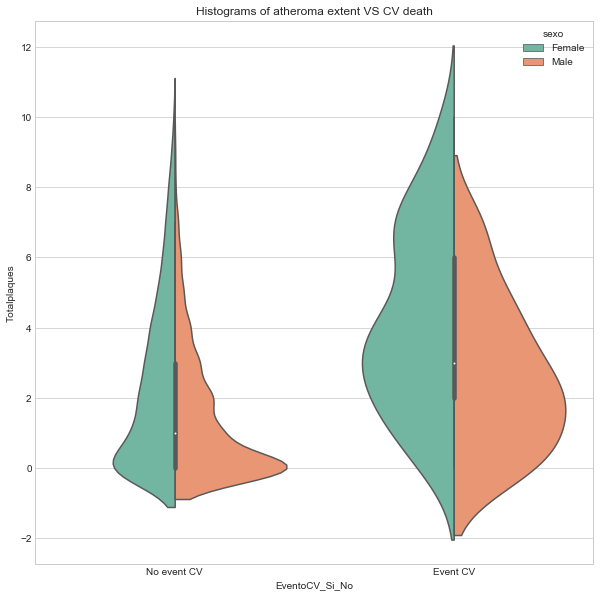

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.violinplot(x="EventoCV_Si_No", y='Totalplaques', hue="sexo",data=df,palette="Set2", split=True)

plt.title("Histograms of atheroma extent VS CV death")
plt.show()

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_resum_grouped = df_resum.groupby(['EventoCV_Si_No', 'Totalplaques','sexo'])['code'].count()

###### Creating histogram for YES CV Events

In [414]:
df_resum_grouped_Si_CV = df_resum[df_resum["EventoCV_Si_No"]=="YES CV Event"].groupby(['Totalplaques','sexo'])['code'].count()

In [421]:
df_resum_grouped_Si_CV = df_resum_grouped_Si_CV.reset_index()

In [439]:
df_resum_grouped_Si_CV_female = df_resum_grouped_Si_CV[df_resum_grouped_Si_CV["sexo"]=="Female"]

df_resum_grouped_Si_CV_female["code"] = (df_resum_grouped_Si_CV["code"][df_resum_grouped_Si_CV["sexo"]=="Female"] \
/ np.sum(df_resum_grouped_Si_CV["code"][df_resum_grouped_Si_CV["sexo"]=="Female"])).values

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [442]:
df_resum_grouped_Si_CV_male = df_resum_grouped_Si_CV[df_resum_grouped_Si_CV["sexo"]=="Male"]

df_resum_grouped_Si_CV_male["code"] = df_resum_grouped_Si_CV["code"][df_resum_grouped_Si_CV["sexo"]=="Male"] \
/ np.sum(df_resum_grouped_Si_CV["code"][df_resum_grouped_Si_CV["sexo"]=="Male"])

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [484]:
df_resum_grouped_Si_CV_histo = pd.concat([df_resum_grouped_Si_CV_female,df_resum_grouped_Si_CV_male])
df_resum_grouped_Si_CV_histo = df_resum_grouped_Si_CV_histo.rename(columns={"code":"Count of Subjects","sexo":"sex"})

##### Creating histogram for NO CV events

In [470]:
df_resum_grouped_No_CV = df_resum[df_resum["EventoCV_Si_No"]=="NO CV Event"].groupby(['Totalplaques','sexo'])['code'].count()

In [471]:
df_resum_grouped_No_CV = df_resum_grouped_No_CV.reset_index()

In [472]:
df_resum_grouped_No_CV_female = df_resum_grouped_No_CV[df_resum_grouped_No_CV["sexo"]=="Female"]

df_resum_grouped_No_CV_female["code"] = (df_resum_grouped_No_CV["code"][df_resum_grouped_No_CV["sexo"]=="Female"] \
/ np.sum(df_resum_grouped_No_CV["code"][df_resum_grouped_No_CV["sexo"]=="Female"])).values

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [473]:
df_resum_grouped_No_CV_male = df_resum_grouped_No_CV[df_resum_grouped_No_CV["sexo"]=="Male"]

df_resum_grouped_No_CV_male["code"] = df_resum_grouped_No_CV["code"][df_resum_grouped_No_CV["sexo"]=="Male"] \
/ np.sum(df_resum_grouped_No_CV["code"][df_resum_grouped_No_CV["sexo"]=="Male"])

/Users/jonatanpinol/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [479]:
df_resum_grouped_No_CV_histo = pd.concat([df_resum_grouped_No_CV_female,df_resum_grouped_No_CV_male])
df_resum_grouped_No_CV_histo = df_resum_grouped_No_CV_histo.rename(columns={"code":"Count of Subjects","sexo":"sex"})

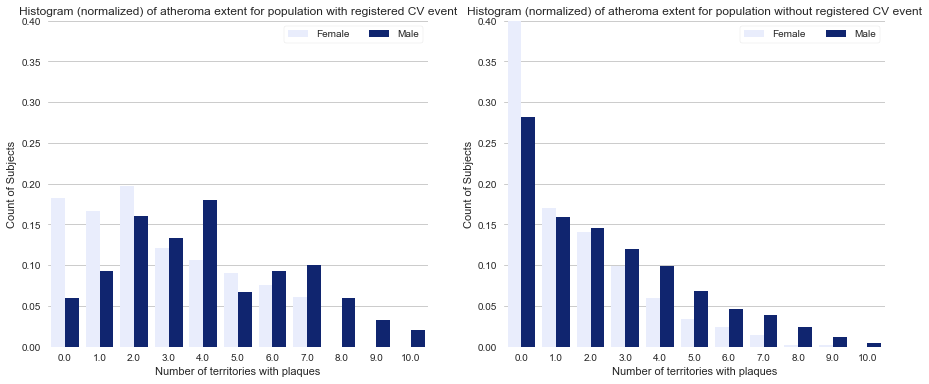

In [562]:
# Initialize the matplotlib figure
#f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))
plt.figure(figsize=(15,6))
# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
ax1 = plt.subplot(121)
ax1.set_title("Histogram (normalized) of atheroma extent for population with registered CV event")
sns.set_color_codes("dark")
g1 = sns.barplot(x='Totalplaques', y="Count of Subjects",hue = "sex", data=df_resum_grouped_Si_CV_histo, color="b")
g1.set(ylim=(0, 0.4))
ax1.legend(ncol=2, loc="upper right", frameon=True)
ax1.set(xlabel="Number of territories with plaques")

sns.despine(left=True, bottom=True)

ax2 = plt.subplot(122)
ax2.set_title("Histogram (normalized) of atheroma extent for population without registered CV event")
sns.set_color_codes("dark")
g2 = sns.barplot(x='Totalplaques', y="Count of Subjects",hue = "sex", data=df_resum_grouped_No_CV_histo, color="b")
g2.set(ylim=(0, 0.4))

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="upper right", frameon=True)
ax2.set(xlabel="Number of territories with plaques")
sns.despine(left=True, bottom=True)

plt.show()

This figure (above) show the histograms of the distribution of plaques by subject sex, considering subjects having suffered a CV event (left) and subjects that haven't suffered a CV event. It is normalized by the number of subjects for each sex so that the proportions can be compared.

There are two main observations concerning these plots. The first one is that we can see that for subjects without a registered CV events, the number of territories with plaques (atheroma extent) is concentrated at 0 territories and while increasing the number of territories with plaque, the number of subjects decrease. In the case of the population with CV events this trent doesn't hold and the majority of atheroma extent is concentrated to 4 regions for male patients and 2 territories for female patients.

The second observation is that the atheroma extent distribution is different for both genders. Male patients tend to have more population on advanced stages of extent while female population is more concentrated in early stages of extent, for both populations types (with and without CV events).

Let's proceed with a more formal analysis of the atheroma extent as a risk factor for CV events.

#### Atheroma extent VS CV events

As before we will proceed with a study of independence of variables through a Pearson's $\chi^2$ test. In figure [under this lines] we created the contingency table for this case : 

For females :

In [521]:
pivot_ = df_resum[df_resum["sexo"]=="Female"].pivot_table(index=["Totalplaques"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero).fillna(0)
pivot_

EventoCV_Si_No,NO CV Event,YES CV Event
Totalplaques,,
0.0,513.0,12.0
1.0,192.0,11.0
2.0,159.0,13.0
3.0,112.0,8.0
4.0,68.0,7.0
5.0,39.0,6.0
6.0,27.0,5.0
7.0,17.0,4.0
8.0,3.0,0.0


In [523]:


import scipy

a=pivot_.values[0,:]
b=pivot_.values[1,:]
c=pivot_.values[2,:]
d=pivot_.values[3,:]
e=pivot_.values[4,:]
f=pivot_.values[5,:]
g=pivot_.values[6,:]
h=pivot_.values[7,:]
i=pivot_.values[8,:]
j=pivot_.values[9,:]

chi2, pvalue, _, _ = scipy.stats.chi2_contingency([a, b, c, d, e, f, g, h, i, j])

In [525]:
chi2 #10 df

33.553105037952214

In [526]:
scipy.stats.chi2.isf(0.05, 9)

16.918977604620451

For males :

In [528]:
pivot_ = df_resum[df_resum["sexo"]=="Male"].pivot_table(index=["Totalplaques"],columns="EventoCV_Si_No",values = "code",aggfunc = np.count_nonzero).fillna(0)
pivot_

EventoCV_Si_No,NO CV Event,YES CV Event
Totalplaques,,
0.0,467,9
1.0,264,14
2.0,242,24
3.0,198,20
4.0,163,27
5.0,113,10
6.0,77,14
7.0,65,15
8.0,40,9


In [529]:
import scipy

a=pivot_.values[0,:]
b=pivot_.values[1,:]
c=pivot_.values[2,:]
d=pivot_.values[3,:]
e=pivot_.values[4,:]
f=pivot_.values[5,:]
g=pivot_.values[6,:]
h=pivot_.values[7,:]
i=pivot_.values[8,:]
j=pivot_.values[9,:]
k=pivot_.values[10,:]

chi2, pvalue, _, _ = scipy.stats.chi2_contingency([a, b, c, d, e, f, g, h, i, j,k])

In [532]:
chi2

73.350908506678778

In [530]:
scipy.stats.chi2.isf(0.05, 10)

18.307038053275143

In [531]:
print("Number of patients without event" ,len(df["EventoCV_Si_No"][df["EventoCV_Si_No"]==0]))

Number of patients without event 2788


In [15]:
len(df["EventoCV_Si_No"][df["EventoCV_Si_No"]==1])

216

In [19]:
len(df['mortCV'])

3004

In [373]:
df.columns

Index(['placas_cc_d', 'placas_med_bif_d', 'placas_med_car_d', 'placas_cc_i',
       'placas_med_bif_i', 'placas_med_car_i', 'placas_fem_com_d',
       'placas_fem_sup_d', 'placas_fem_com_i', 'placas_fem_sup_i',
       'EventoCV_Si_No', 'muerte', 'sexo', 'Totalplaques', 'CCAplaca',
       'bulb_placa', 'mortCV'],
      dtype='object')